(c) [Julius Hense](https://github.com/hense96) & [Mina Jamshidi](https://github.com/minajamshidi) @ TU Berlin, 2024

(c) This notebook is an asset of xMIL: https://github.com/tubml-pathology/xMIL

Please note the license and citation instructions as described in the above repository.

This notebook replicates the plots and results of patch flipping experiments.

# Section 1:  load the data

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

In [2]:
import os
import json
import pandas as pd

import numpy as np
from scipy.stats import ttest_rel

import seaborn as sns
import matplotlib.pyplot as plt


from visualization.evaluation import plot_perturbation_curve, plot_ave_prob_boxplots
from visualization.utils import compute_auc

In [3]:
# results_dir_root = '/path/to/xMIL/results/patch_flipping_publication_ig' 
# fig_save_dir = os.path.join(results_dir_root, 'figures')
results_dir = '/Users/mina/Documents/Codes/My_codes/Digital_Pathology/xMIL/results/patch_flipping_bugfix'


In [4]:

projects = ['camelyon',  'nsclc', 'hnsc','tp53']
project_label = ['Camelyon', 'NSCLC', 'HNSC HPV', 'LUAD TP53']  

heatmap_types = ['lrp', 'gi', 'occlusion_keep', 'attention_rollout', 'ig', 'random'] # 'ig'
heatmap_types_label = ['LRP', 'GxI', 'Single', 'Attn', 'IG', 'Rand']  # 'IG'
 
fontsize = 12

flip_steps = np.arange(0, 101, 1)


In [5]:
colors = ["#B01650", "#1E88E5", "#FFC107", "#8AB187", "#8BD4E7", "#F18966"  ]
palette = sns.color_palette(colors)

# DROPPING

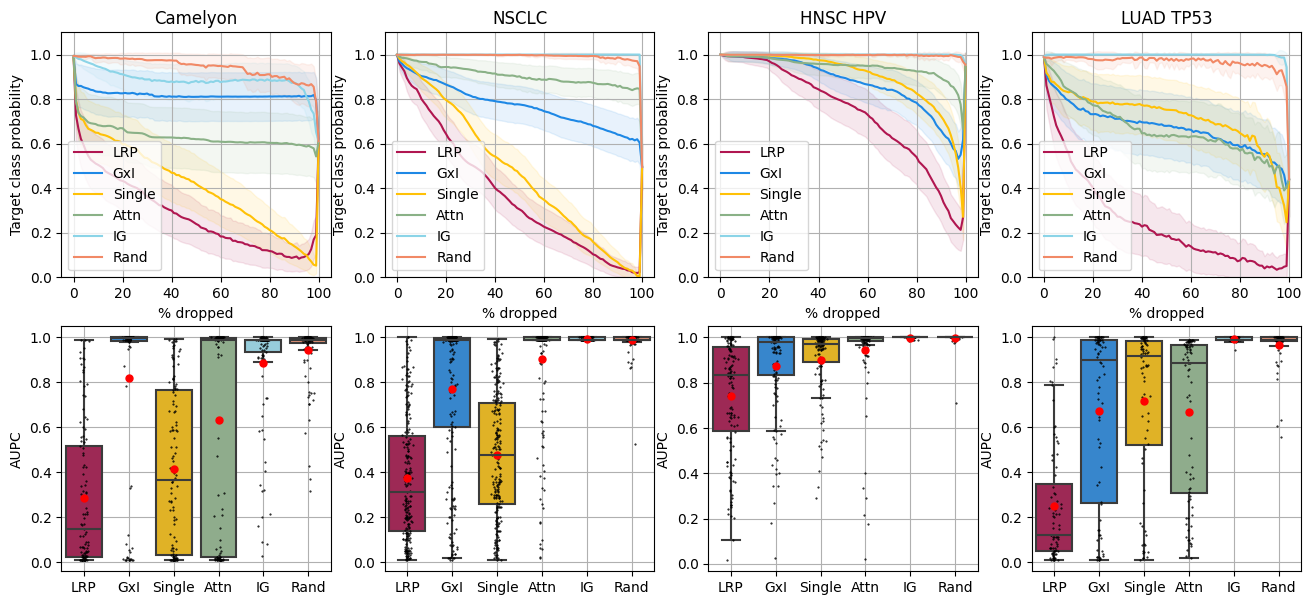

In [6]:
fig = plt.figure(figsize=(16, 7))
i = 0
probs_transmil_drop = dict()

for project, proj_label in zip(projects, project_label):
    slide_ids = None
    i += 1
    
    
    probs_transmil_drop_ = dict()
    for heatmap in heatmap_types:
        file_name = os.path.join(results_dir, f'{project}_transmil', f'{heatmap}_drop_patch_flipping_results.csv')
        df = pd.read_csv(file_name)
        df = df[df['false_pred'] == False]
        if slide_ids is None:
            slide_ids = df['slide_id'].tolist()
        assert slide_ids == df['slide_id'].tolist()
        pred_probs = [np.array(json.loads(probs)) for probs in df['predicted_probs'].tolist()]
        probs_transmil_drop_[heatmap] = pred_probs
        
    probs_transmil_drop[project] = probs_transmil_drop_
    
    plt.subplot(2, 4, i)
    plot_perturbation_curve(probs_transmil_drop_,
                            flip_steps, [], palette, '% dropped', 'Target class probability', heatmap_types_label,
                            n_se=3, std=False)
    plt.title(proj_label)

    ax2 = plt.subplot(2, 4, 4 + i)
    plot_ave_prob_boxplots(ax2, probs_transmil_drop_, heatmap_types_label, palette, [], 
                          'AUPC', showfliers=True, significance_bars=False, verbose=False)
